## Linear Regression
Let's fabricate some data that shows a roughly linear relationship between page speed and amount purchased

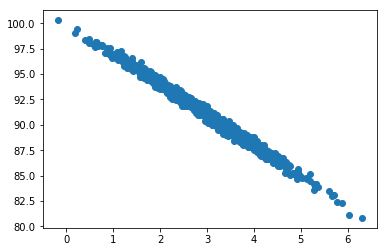

In [4]:
import numpy as np
import matplotlib.pyplot as plt

pageSpeeds = np.random.normal(3.0,1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0,0.1, 1000)) * 3

plt.scatter(pageSpeeds, purchaseAmount)

In [5]:
from scipy import stats

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [7]:
r_value**2

0.989990719852817

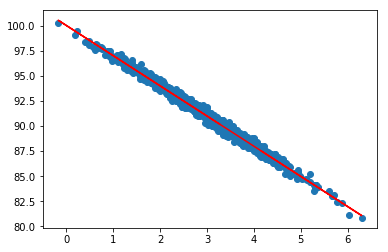

In [9]:
# Fitting a line based on the regression calculated, calculate new value for the data and plot
def predict(x):
    return slope * x + intercept
fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show

## Polynomial Regression.

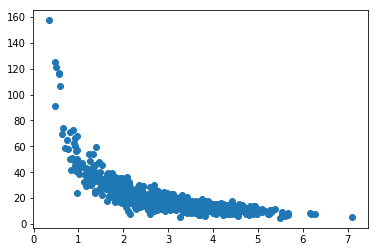

In [11]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0,10.0,1000) /pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an noth-degree polynomial model of our data that minimizes squred error. Let's try it with a 4th degree polunomial:

In [12]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)
p4 = np.poly1d(np.polyfit(x,y,4))

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds

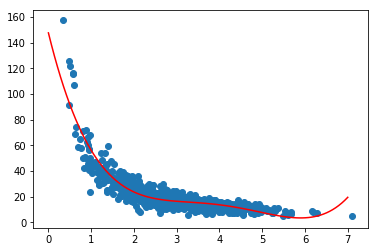

In [15]:
xp = np.linspace(0,7,100)
plt.scatter(x,y)
plt.plot(xp, p4(xp), c='r')

Looks pretty good, lets measure the r-squared error

In [16]:
from sklearn.metrics import r2_score

In [18]:
r2 = r2_score(y, p4(x))
r2

0.8293766396303072

#### which isnt too bad because 0 is bad and 1 is perfect fitting. 0.82 is pretty good.

## Multivariate Regression
- Also known as Multiple Regression
- what if more than one variable influences the output
- Example: predicting a price for a car based on its many attributes (body style, brand, mileage, etc.)
\begin{equation*}
price  = \alpha + \beta1mileage + \beta2age + \beta3doors
\end{equation*}

In [20]:
import pandas as pd
df = pd.read_excel('cars.xls')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [29]:
import statsmodels as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage','Cylinder', 'Doors']].as_matrix())
print(X)

est = smf.OLS(y, X).fit()

est.summary()

      Mileage  Cylinder     Doors
0   -1.417485  0.527410  0.556279
1   -1.305902  0.527410  0.556279
2   -0.810128  0.527410  0.556279
3   -0.426058  0.527410  0.556279
4    0.000008  0.527410  0.556279
5    0.293493  0.527410  0.556279
6    0.335001  0.527410  0.556279
7    0.382369  0.527410  0.556279
8    0.511409  0.527410  0.556279
9    0.914768  0.527410  0.556279
10  -1.171368  0.527410  0.556279
11  -0.581834  0.527410  0.556279
12  -0.390532  0.527410  0.556279
13  -0.003899  0.527410  0.556279
14   0.430591  0.527410  0.556279
15   0.480156  0.527410  0.556279
16   0.509822  0.527410  0.556279
17   0.757160  0.527410  0.556279
18   1.594886  0.527410  0.556279
19   1.810849  0.527410  0.556279
20  -1.326046  0.527410  0.556279
21  -1.129860  0.527410  0.556279
22  -0.667658  0.527410  0.556279
23  -0.405792  0.527410  0.556279
24  -0.112796  0.527410  0.556279
25  -0.044552  0.527410  0.556279
26   0.190700  0.527410  0.556279
27   0.337442  0.527410  0.556279
28   0.566102 

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the C

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     18.11
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           2.23e-11
Time:                        16:08:11   Log-Likelihood:                -9207.1
No. Observations:                 804   AIC:                         1.842e+04
Df Residuals:                     801   BIC:                         1.843e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analysis
The table of coefficients above gives use the values to plug into an equation of form
B0 + B1*Mileage + B2*model_ord + B3*doors

In this example, its pretty clear that the number of cylinders is more important than anything based on the coefficients.

Could we have figured that out earlier?

In [30]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Surprisingly, more doors does not mean a higher price So its not surprising that its pretty useless as a predictor here. This is very small data set however, so we can't read much meaning into it.